In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Metro Bike 2024-Q2

In [3]:
df = pd.read_csv('/Users/cheng/Desktop/Pocketride project/metro-trips-2024-q2.csv')

In [11]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,trip_duration
0,372445882,13,2024-04-01 00:11:00,2024-04-01 00:24:00,4293,34.062279,-118.271523,4293,34.062279,-118.271523,30390,30,Round Trip,Monthly Pass,electric,13.0
1,372445942,5,2024-04-01 00:36:00,2024-04-01 00:41:00,3062,34.047749,-118.243172,4578,34.042980,-118.252953,20016,30,One Way,Monthly Pass,standard,5.0
2,372445944,9,2024-04-01 00:37:00,2024-04-01 00:46:00,4538,34.065430,-118.308823,4440,34.061661,-118.298241,20035,30,One Way,Monthly Pass,standard,9.0
3,372456735,15,2024-04-01 00:51:00,2024-04-01 01:06:00,4447,34.061600,-118.281990,4410,34.063351,-118.296799,13779,1,One Way,Walk-up,standard,15.0
4,372499944,324,2024-04-01 01:03:00,2024-04-01 06:27:00,4220,34.074829,-118.258728,4220,34.074829,-118.258728,13626,30,Round Trip,Monthly Pass,standard,324.0


In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Calculate the trip duration in minutes
df['trip_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

In [18]:
a=(df['trip_duration'] == 0).sum()
a

# Cancellations or Incomplete Trips: 
    # Users may have checked out a bike and immediately returned it due to errors, wrong bike selection, or technical issues.
# Test rides or calibration data 
# Clock Sync Issues on the bike system, stations, or GPS devices

49

In [168]:
df.count()

trip_id                143616
duration               143616
start_time             143616
end_time               143616
start_station          143616
start_lat              143590
start_lon              143590
end_station            143616
end_lat                141248
end_lon                141248
bike_id                143616
plan_duration          143616
trip_route_category    143616
passholder_type        143616
bike_type              143616
trip_duration          143616
start_hour             143616
weekday                143616
trip_length_km         141246
dtype: int64

In [21]:
df.isnull().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat                26
start_lon                26
end_station               0
end_lat                2368
end_lon                2368
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
trip_duration             0
dtype: int64

# Graphs

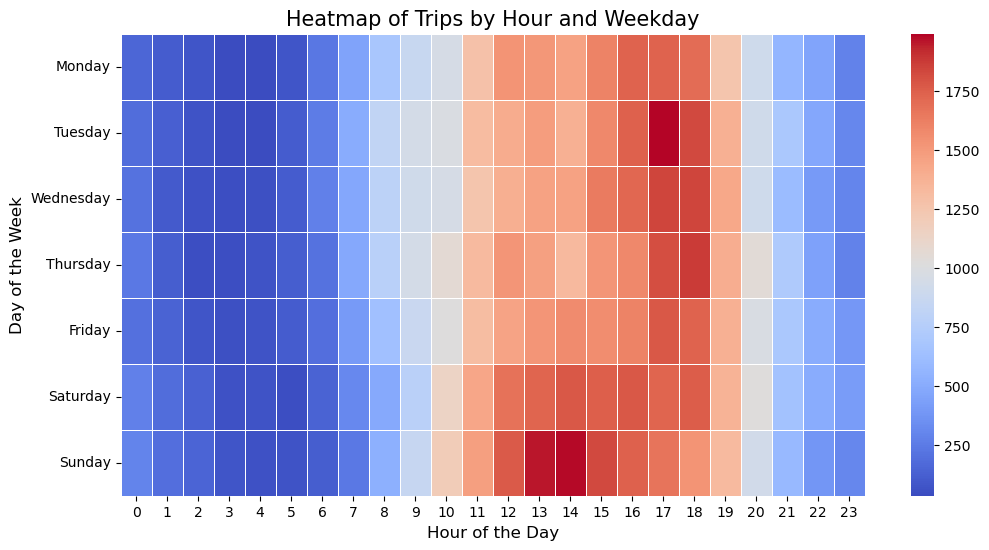

In [29]:
# Extract hour and weekday from the 'started_at' column for analysis
df['start_hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.day_name()

# Pivot table for heatmap: Trips by hour and weekday
trips_by_hour_weekday = df.pivot_table(index='weekday', columns='start_hour', aggfunc='size', fill_value=0)

# Reorder weekdays to start from Monday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_hour_weekday = trips_by_hour_weekday.reindex(weekday_order)

# Heatmap: Number of trips by hour and weekday
plt.figure(figsize=(12, 6))
sns.heatmap(trips_by_hour_weekday, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Heatmap of Trips by Hour and Weekday', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.show()

In [33]:
print(df.dtypes)


trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                         int64
plan_duration                   int64
trip_route_category            object
passholder_type                object
bike_type                      object
trip_duration                 float64
start_hour                      int64
weekday                        object
dtype: object


In [36]:
print(df_filtered['passholder_type'].unique())

['Monthly Pass' 'Walk-up' 'Annual Pass' 'One Day Pass']


In [38]:
df_filtered['passholder_type'] = df_filtered['passholder_type'].astype('category')

/var/folders/sf/qkrwk5617wgdw0frsrqmg17r0000gn/T/ipykernel_78228/2931977191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['passholder_type'] = df_filtered['passholder_type'].astype('category')


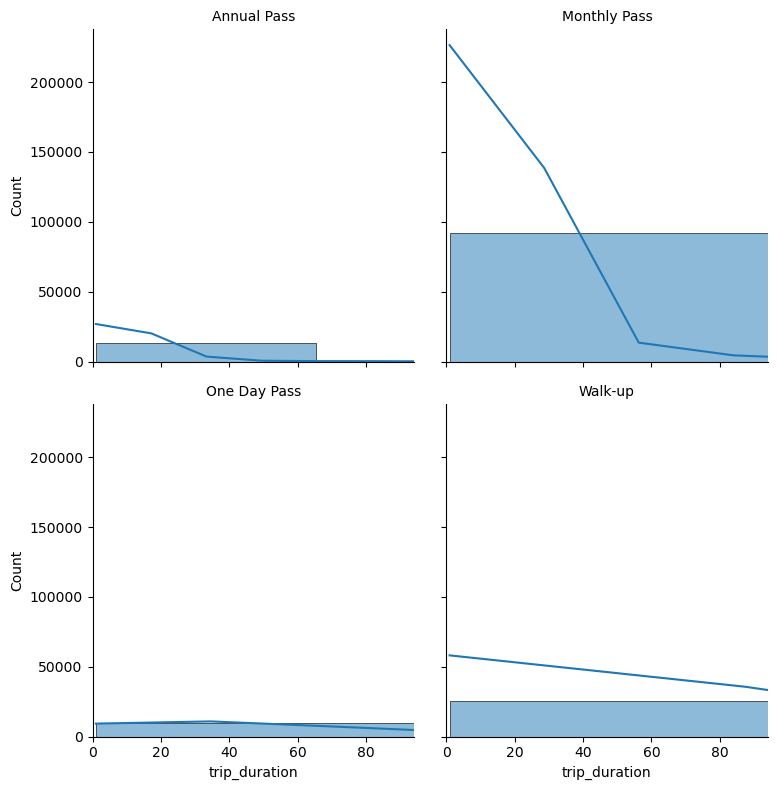

In [41]:
g = sns.FacetGrid(df_filtered, col="passholder_type", col_wrap=2, height=4)
g.map(sns.histplot, "trip_duration", bins=50, kde=True)
g.set_titles("{col_name}")
plt.xlim(0, df_filtered['trip_duration'].quantile(0.95))  # Limit to the 95th percentile
plt.show()

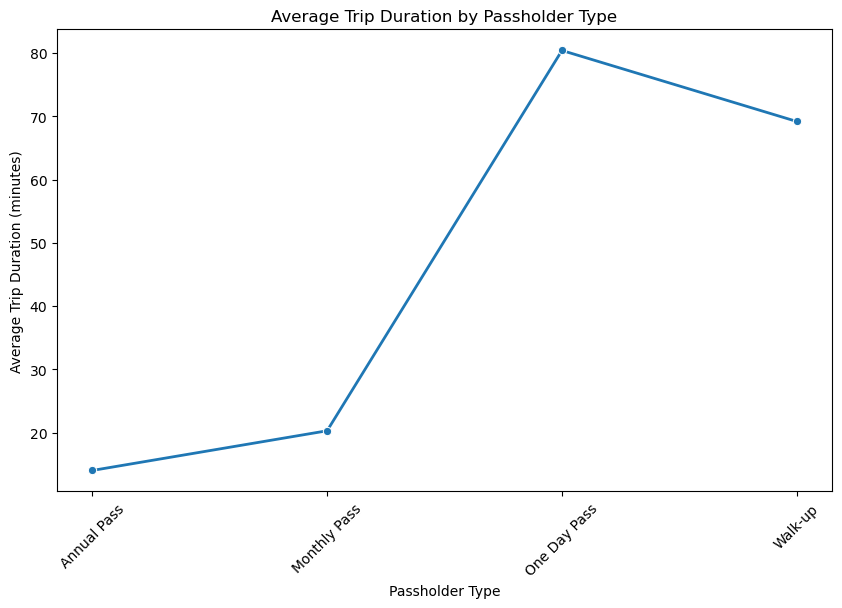

In [45]:
# Group the data by 'passholder_type' and calculate the average trip duration
avg_trip_duration_by_passholder = df_filtered.groupby('passholder_type')['trip_duration'].mean().reset_index()

# Sort by average trip duration for better visualization
avg_trip_duration_by_passholder = avg_trip_duration_by_passholder.sort_values(by='trip_duration')

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_trip_duration_by_passholder, x='passholder_type', y='trip_duration', marker='o', linewidth=2)

plt.title('Average Trip Duration by Passholder Type')
plt.xlabel('Passholder Type')
plt.ylabel('Average Trip Duration (minutes)')

plt.xticks(rotation=45)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


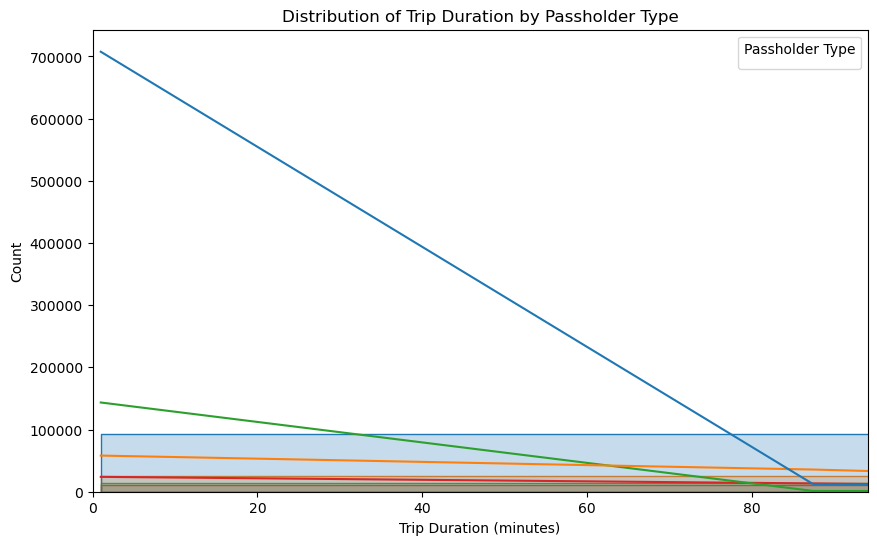

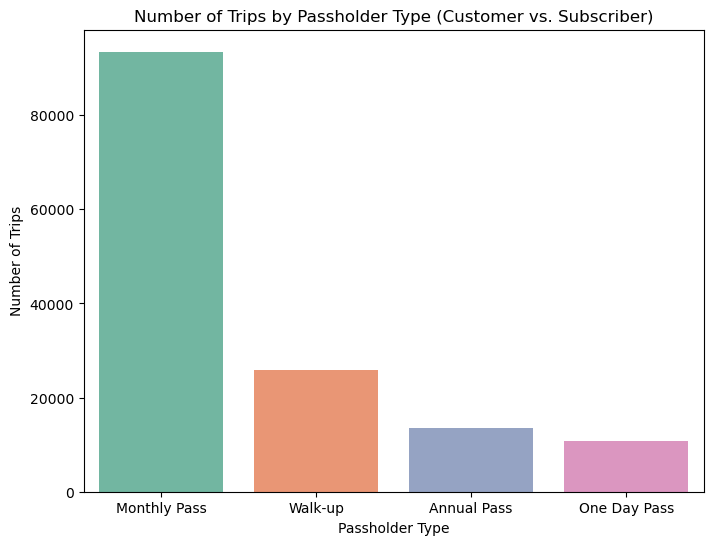

In [34]:
df['trip_duration'] = pd.to_numeric(df['trip_duration'], errors='coerce')
df_filtered = df[df['trip_duration'] > 0]

# Distribution of Trip Duration by Passholder Type (Customer vs. Subscriber)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='trip_duration', hue='passholder_type', bins=50, kde=True, element="step")
plt.title('Distribution of Trip Duration by Passholder Type')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Count')
plt.xlim(0, df_filtered['trip_duration'].quantile(0.95))  # Limit to the 95th percentile for better visualization
plt.legend(title='Passholder Type')
plt.show()

# Number of Trips by Passholder Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='passholder_type', palette='Set2')
plt.title('Number of Trips by Passholder Type (Customer vs. Subscriber)')
plt.xlabel('Passholder Type')
plt.ylabel('Number of Trips')
plt.show()


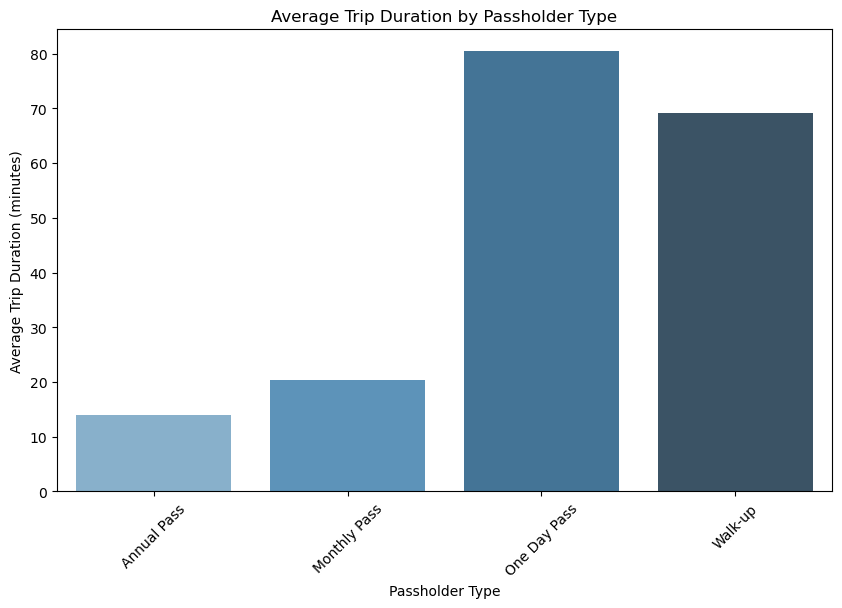

In [49]:
# Duration of trip

# Group by passholder_type and calculate the average trip duration
avg_trip_duration_by_passholder = df_filtered.groupby('passholder_type')['trip_duration'].mean().reset_index()
avg_trip_duration_by_passholder.columns = ['passholder_type', 'avg_trip_duration']

# Plot a bar graph for the average trip duration by passholder type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_trip_duration_by_passholder, x='passholder_type', y='avg_trip_duration', palette='Blues_d')
plt.title('Average Trip Duration by Passholder Type')
plt.xlabel('Passholder Type')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

In [35]:
# Length of trip

# Function to calculate the Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers (mean value)
    r = 6371.0  
    return c * r


df['trip_length_km'] = haversine(df['start_lat'], df['start_lon'], df['end_lat'], df['end_lon'])

df[['start_lat', 'start_lon', 'end_lat', 'end_lon', 'trip_length_km']].head()


,start_lat,start_lon,end_lat,end_lon,trip_length_km
0,34.062279,-118.271523,34.062279,-118.271523,0.000000
1,34.047749,-118.243172,34.042980,-118.252953,1.045623
2,34.065430,-118.308823,34.061661,-118.298241,1.061044
3,34.061600,-118.281990,34.063351,-118.296799,1.377984
4,34.074829,-118.258728,34.074829,-118.258728,0.000000


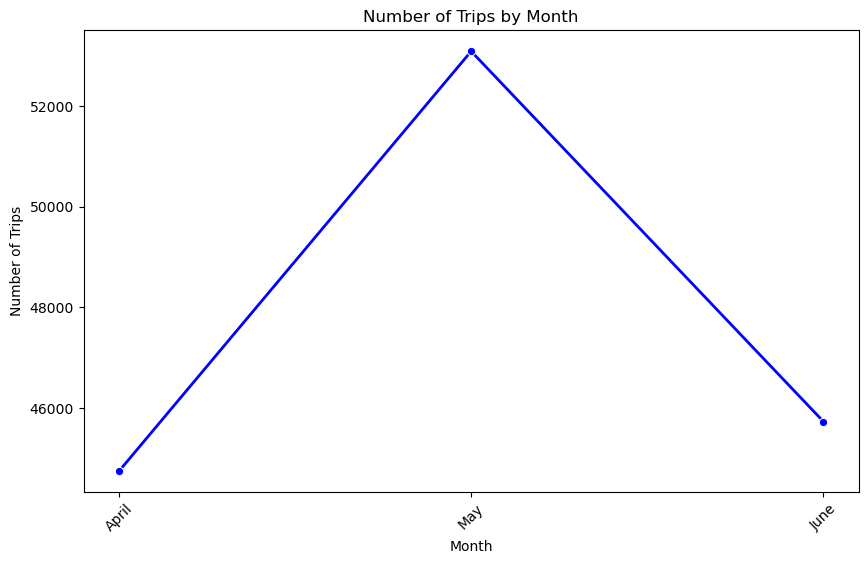

In [48]:
# Number of trips by month

df_filtered['start_time'] = pd.to_datetime(df_filtered['start_time'])

df_filtered['month'] = df_filtered['start_time'].dt.strftime('%B')  # Extract month name
df_filtered['month_num'] = df_filtered['start_time'].dt.month  # Extract numerical month for sorting

# Group by month and count the number of trips
trips_by_month = df_filtered.groupby('month_num')['trip_id'].count().reset_index()
trips_by_month.columns = ['month_num', 'number_of_trips']

# Add month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
trips_by_month['month'] = trips_by_month['month_num'].map(month_names)

# Sort by the month number to maintain the correct order
trips_by_month = trips_by_month.sort_values('month_num')

plt.figure(figsize=(10, 6))
sns.lineplot(data=trips_by_month, x='month', y='number_of_trips', marker='o', linewidth=2, color='blue')
plt.title('Number of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.show()


# Bay Wheel Lyft 2024-09

In [69]:
bw = pd.read_csv('/Users/cheng/Desktop/Pocketride project/202409-baywheels-tripdata.csv')

In [63]:
bw.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_minutes
0,AAFD5548143DCE0A,electric_bike,2024-09-10 08:45:14.070,2024-09-10 09:06:58.772,30th St at San Jose Ave,SF-T21,2nd St at Folsom St,SF-H29,37.742314,-122.423181,37.785199,-122.396217,member,21.745033
1,7814A8CB2C9A70BB,electric_bike,2024-09-11 07:53:30.649,2024-09-11 08:12:53.687,30th St at San Jose Ave,SF-T21,2nd St at Folsom St,SF-H29,37.742314,-122.423181,37.785199,-122.396217,member,19.383967
2,52170B200ED0FC6C,classic_bike,2024-09-12 23:20:34.071,2024-09-13 06:46:52.702,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,The Embarcadero at Steuart St,SF-F30-1,37.771767,-122.386689,37.791401,-122.391038,casual,446.310517
3,64DCD491A935BD82,classic_bike,2024-09-21 12:35:12.297,2024-09-21 12:39:00.009,Fifth St at Delaware St,BK-C1,Addison St at Fourth St,BK-D1,37.870407,-122.299676,37.866249,-122.299371,casual,3.795200
4,F9C466FFD635DF57,classic_bike,2024-09-26 08:00:35.009,2024-09-26 08:10:24.804,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,The Embarcadero at Steuart St,SF-F30-1,37.771767,-122.386689,37.791401,-122.391038,member,9.829917


In [53]:
bw.describe()

,start_lat,start_lng,end_lat,end_lng
count,334732.000000,334732.000000,334640.000000,334640.000000
mean,37.770430,-122.394295,37.770553,-122.394061
std,0.074888,0.095100,0.074864,0.095044
min,37.280000,-122.511208,37.260000,-122.511208
25%,37.767045,-122.430000,37.767045,-122.429148
50%,37.777053,-122.412083,37.777416,-122.411536
75%,37.790588,-122.394880,37.790803,-122.394880
max,37.880283,-121.810000,37.950000,-121.810000


In [155]:
bw.count()

ride_id               334732
rideable_type         334732
started_at            334732
ended_at              334732
start_station_name    320742
start_station_id      320742
end_station_name      317880
end_station_id        317803
start_lat             334732
start_lng             334732
end_lat               334640
end_lng               334640
member_casual         334732
duration_minutes      334732
date                  334732
distance              334640
day_of_week           334732
hour_of_day           334732
dtype: int64

In [84]:
bw.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    13990
start_station_id      13990
end_station_name      16852
end_station_id        16929
start_lat                 0
start_lng                 0
end_lat                  92
end_lng                  92
member_casual             0
duration_minutes          0
date                      0
dtype: int64

In [171]:
print(bw['start_station_name'].unique())

['30th St at San Jose Ave' 'Terry Francois Blvd at Mission Bay Blvd N'
 'Fifth St at Delaware St' 'The Embarcadero at Bryant St'
 '16th St at Prosper St' 'Harrison St at 14th St' 'Market St at 10th St'
 '14th St at Mission St' 'Esprit Park' 'Haight St at Lyon St'
 '32nd St at Adeline St' '5th St at Howard St' 'Page St at Masonic Ave'
 '4th St at Long Bridge St' 'Fell St at Stanyan St' '1st St at Folsom St'
 'Division St at Potrero Ave' 'Folsom St at 13th St'
 'Sanchez St at 17th St' 'Webster St at Grove St' 'Anza St at Collins St'
 'Alemany Blvd at Ocean Ave' 'McCoppin St at Valencia St'
 'Jackson Playground' 'Downtown Berkeley BART'
 'Addison St at California St' 'Leavenworth St at Broadway'
 'Montgomery St at Pacific Ave' 'Otis St at Brady St' 'Lyon St at Fell St'
 '3rd St at King St' 'Spruce St at California St' 'Garfield Square'
 'Howard St at 6th St' 'North Berkeley BART' 'Washington St at 8th St'
 'Salesforce Transit Center' 'Julian St at The Alameda'
 '20th St at Dolores St' 'Lo

In [172]:
bw['started_at'].min()

Timestamp('2024-08-31 13:28:45.373000')

In [173]:
bw['started_at'].max()

Timestamp('2024-09-30 23:50:44.810000')

In [70]:
bw['started_at'] = pd.to_datetime(bw['started_at'])
bw['ended_at'] = pd.to_datetime(bw['ended_at'])

bw['duration_minutes'] = (bw['ended_at'] - bw['started_at']).dt.total_seconds() / 60


In [138]:
# distance

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    lat1_rad, lat2_rad = np.radians(lat1), np.radians(lat2)
    delta_lat = lat2_rad - lat1_rad
    delta_lon = np.radians(lon2 - lon1)
    
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c  # Distance in kilometers

bw['distance'] = bw.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'started_at' column is in datetime format
bw['started_at'] = pd.to_datetime(bw['started_at'])

# Extract day of the week and hour of the day
bw['day_of_week'] = bw['started_at'].dt.day_name()  # Get the name of the day
bw['hour_of_day'] = bw['started_at'].dt.hour  # Get the hour of the day

# Sort days of the week in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


/var/folders/sf/qkrwk5617wgdw0frsrqmg17r0000gn/T/ipykernel_78228/3748758943.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=bw1, x='day_of_week', y='distance', estimator='mean', ci=None, sort=False)


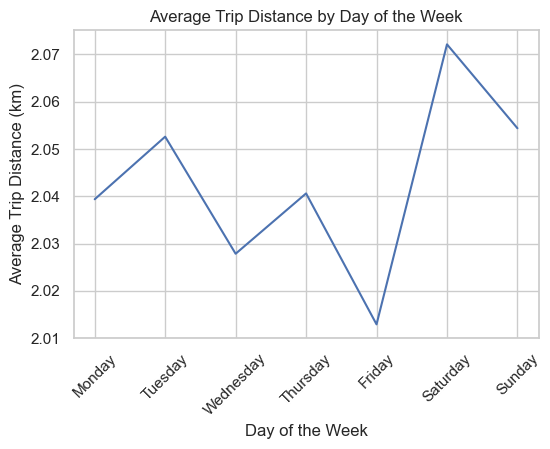

In [159]:
bw['day_of_week'] = pd.Categorical(bw['day_of_week'], categories=day_order, ordered=True)
bw1 = bw.sort_values('day_of_week')

# Plot Trip Distance vs Day of the Week
plt.figure(figsize=(6,4))
sns.lineplot(data=bw1, x='day_of_week', y='distance', estimator='mean', ci=None, sort=False)
plt.title('Average Trip Distance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Distance (km)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/sf/qkrwk5617wgdw0frsrqmg17r0000gn/T/ipykernel_78228/1577133918.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=bw, x='hour_of_day', y='distance', estimator='mean', ci=None)


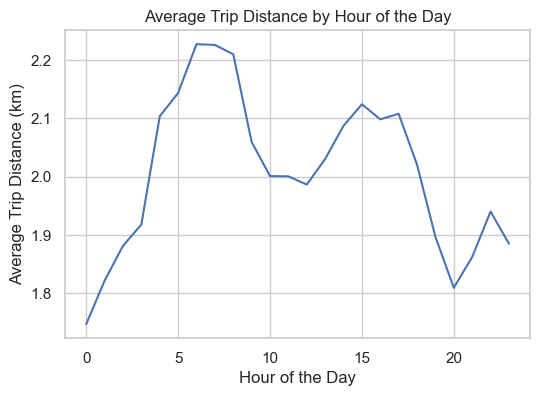

In [144]:
# Plot Trip Distance vs Hour of the Day
plt.figure(figsize=(6,4))
sns.lineplot(data=bw, x='hour_of_day', y='distance', estimator='mean', ci=None)
plt.title('Average Trip Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (km)')
plt.grid(True)
plt.show()

In [71]:
type_counts = bw['rideable_type'].value_counts()
user_counts = bw['member_casual'].value_counts()

In [73]:
type_counts

electric_bike       260171
classic_bike         74553
electric_scooter         8
Name: rideable_type, dtype: int64

In [74]:
user_counts

member    252413
casual     82319
Name: member_casual, dtype: int64

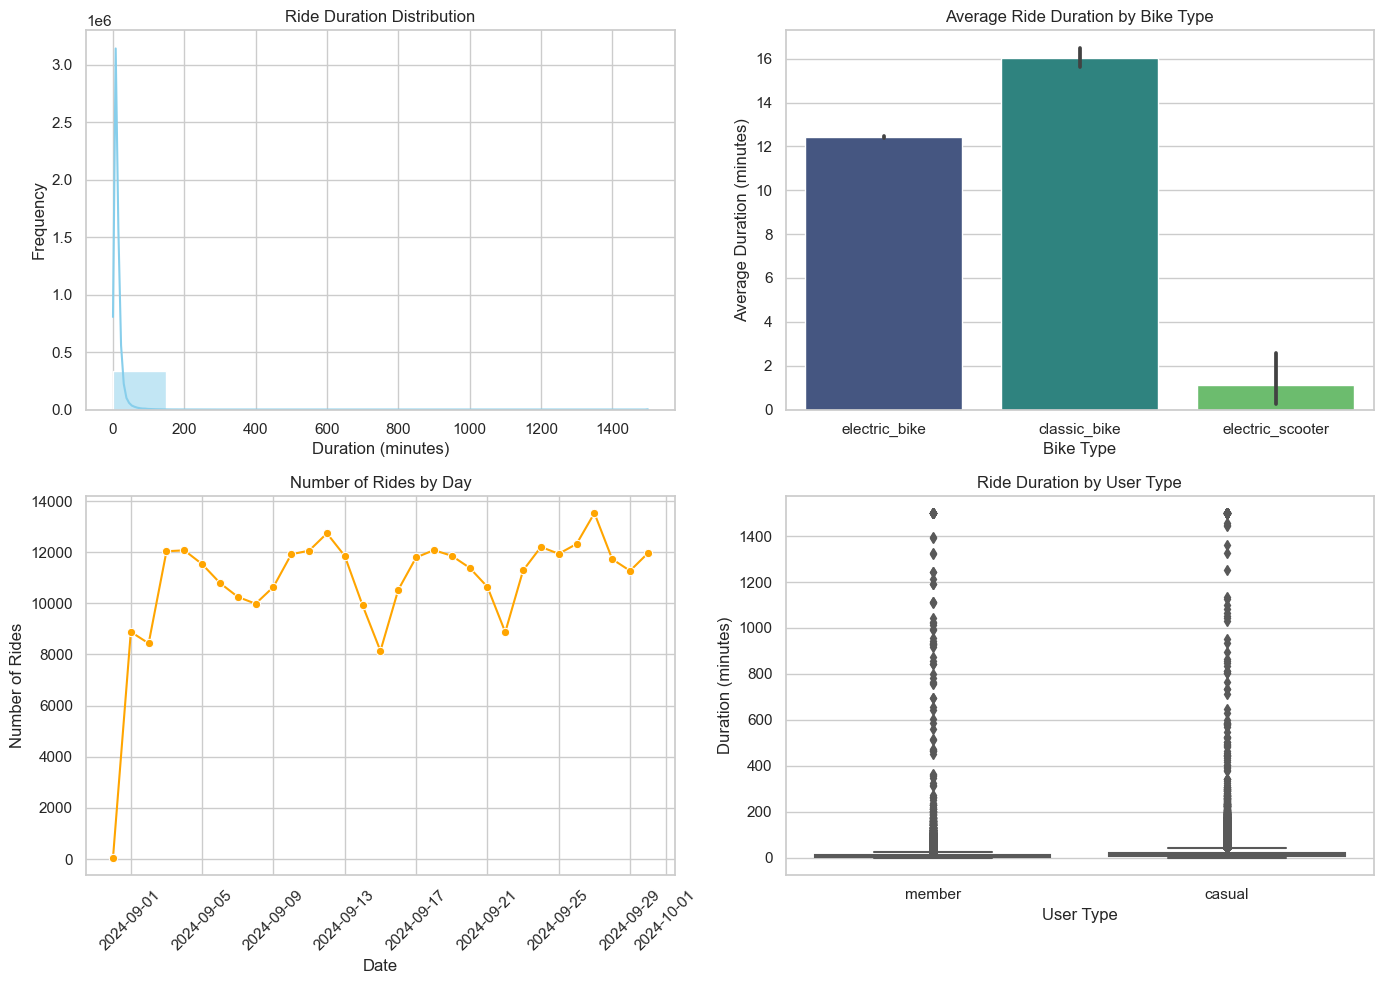

In [72]:

plt.figure(figsize=(14, 10))
sns.set(style='whitegrid')

# 1. Histogram of Ride Duration
plt.subplot(2, 2, 1)
sns.histplot(bw['duration_minutes'], bins=10, kde=True, color='skyblue')
plt.title('Ride Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# 2. Average Ride Duration by Type
plt.subplot(2, 2, 2)
sns.barplot(x='rideable_type', y='duration_minutes', data=bw, estimator='mean', palette='viridis')
plt.title('Average Ride Duration by Bike Type')
plt.xlabel('Bike Type')
plt.ylabel('Average Duration (minutes)')

# 3. Number of Rides by Day
bw['date'] = bw['started_at'].dt.date
rides_per_day = bw['date'].value_counts().sort_index()
plt.subplot(2, 2, 3)
sns.lineplot(x=rides_per_day.index, y=rides_per_day.values, marker='o', color='orange')
plt.title('Number of Rides by Day')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

# 4. Boxplot of Duration by Member Type
plt.subplot(2, 2, 4)
sns.boxplot(x='member_casual', y='duration_minutes', data=bw, palette='Set2')
plt.title('Ride Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()


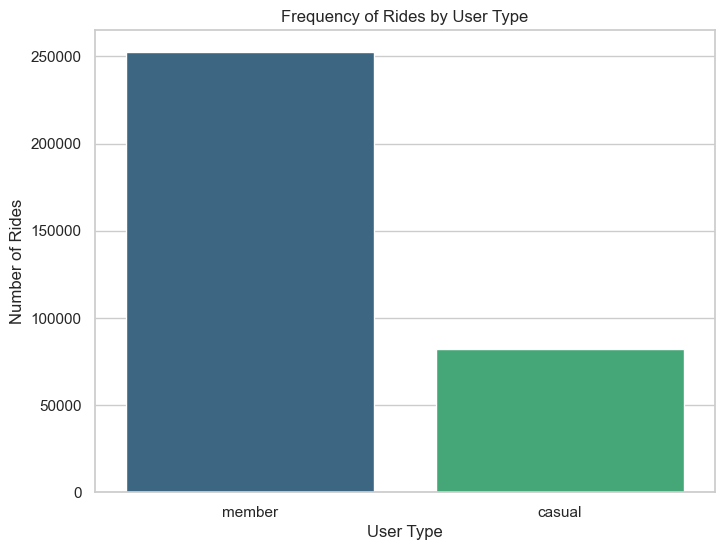

In [76]:
# Frequency of each user type
user_type_counts = bw['member_casual'].value_counts()

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')

sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='viridis')
plt.title('Frequency of Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)

plt.show()

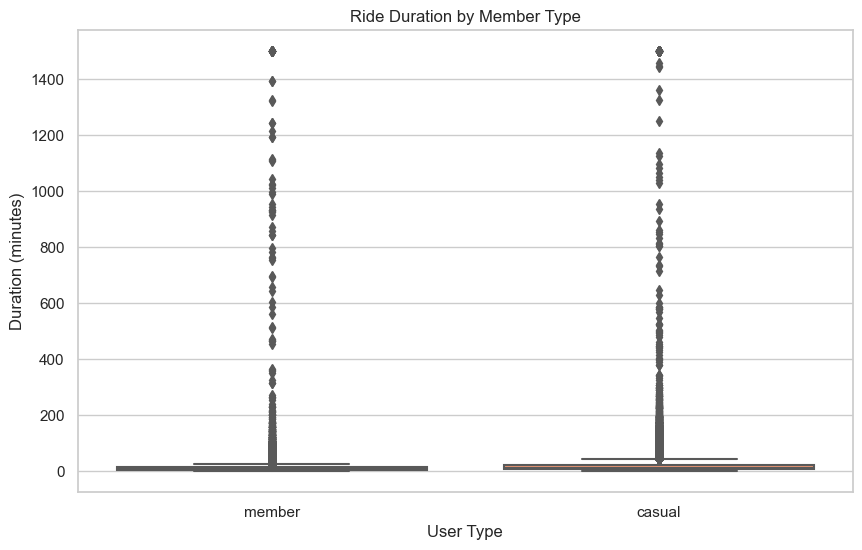

In [78]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Create a boxplot for duration by member type
sns.boxplot(x='member_casual', y='duration_minutes', data=bw, palette='Set2')
plt.title('Ride Duration by Member Type')
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')

# Show the plot
plt.show()

In [88]:
Q1 = bw['duration_minutes'].quantile(0.25)
Q3 = bw['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = bw[(bw['duration_minutes'] < lower_bound) | (bw['duration_minutes'] > upper_bound)]
print(outliers)

                 ride_id  rideable_type              started_at  \
2       52170B200ED0FC6C   classic_bike 2024-09-12 23:20:34.071   
28      F26860DF5897717C  electric_bike 2024-09-29 10:46:32.207   
104     E4B4F3019DEFC351  electric_bike 2024-09-16 14:41:38.459   
113     93013069607A74E9  electric_bike 2024-09-17 20:37:29.200   
114     E4B12829FC9618D3  electric_bike 2024-09-14 13:39:41.539   
...                  ...            ...                     ...   
334584  E981CE4DABD695D9  electric_bike 2024-09-21 18:36:46.241   
334603  9517291AEEAE8B33  electric_bike 2024-09-06 14:04:49.342   
334642  293A5F67CF7C59F1  electric_bike 2024-09-09 12:11:36.587   
334681  0586A1A1441B8E82   classic_bike 2024-09-03 11:00:15.073   
334685  97CEEAF4CF792A36   classic_bike 2024-09-03 10:59:15.697   

                      ended_at                         start_station_name  \
2      2024-09-13 06:46:52.702  Terry Francois Blvd at Mission Bay Blvd N   
28     2024-09-29 11:29:03.671           

In [93]:
long_ride_info = bw[bw['duration_minutes'] > 400]  # Adjust threshold as needed
print(long_ride_info)

                 ride_id rideable_type              started_at  \
2       52170B200ED0FC6C  classic_bike 2024-09-12 23:20:34.071   
364     44B6A13644588C3F  classic_bike 2024-09-03 15:46:02.585   
3682    A1CC55474AF51941  classic_bike 2024-09-24 17:15:53.802   
9783    619D6F0D6A65A71A  classic_bike 2024-09-01 14:06:53.151   
10127   B5E3B3F0771120EF  classic_bike 2024-09-10 16:49:52.452   
...                  ...           ...                     ...   
315860  5D202847CD4F2215  classic_bike 2024-09-03 21:11:46.414   
317372  0BD813B6F2C8D32F  classic_bike 2024-09-29 17:38:53.620   
320022  5E051CACC13B2407  classic_bike 2024-09-04 09:21:57.685   
327074  522EE2561C65122B  classic_bike 2024-09-27 20:46:27.847   
331706  BC1178CF51F761C1  classic_bike 2024-09-28 23:58:00.223   

                      ended_at                         start_station_name  \
2      2024-09-13 06:46:52.702  Terry Francois Blvd at Mission Bay Blvd N   
364    2024-09-04 07:40:11.388                      9

9783    619D6F0D6A65A71A  classic_bike 2024-09-01 14:06:53.151   2024-09-02 12:14:25.987                          West Crissy Field   37.803826 -122.467709  37.803968 -122.455079        casual  

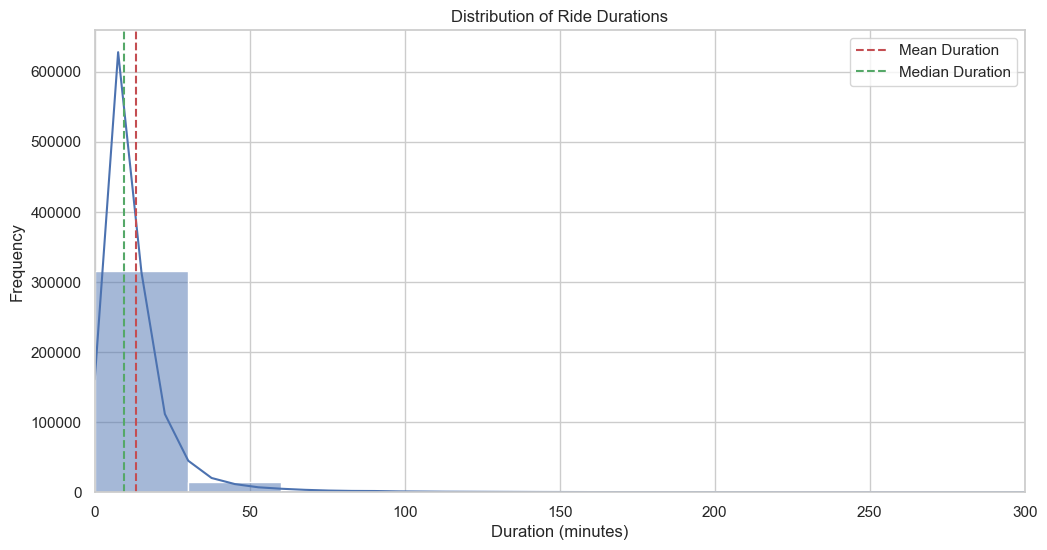

In [90]:
plt.figure(figsize=(12, 6))
sns.histplot(bw['duration_minutes'], bins=50, kde=True)
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 300)  # Limit x-axis to focus on the main distribution
plt.axvline(bw['duration_minutes'].mean(), color='r', linestyle='--', label='Mean Duration')
plt.axvline(bw['duration_minutes'].median(), color='g', linestyle='--', label='Median Duration')
plt.legend()
plt.show()

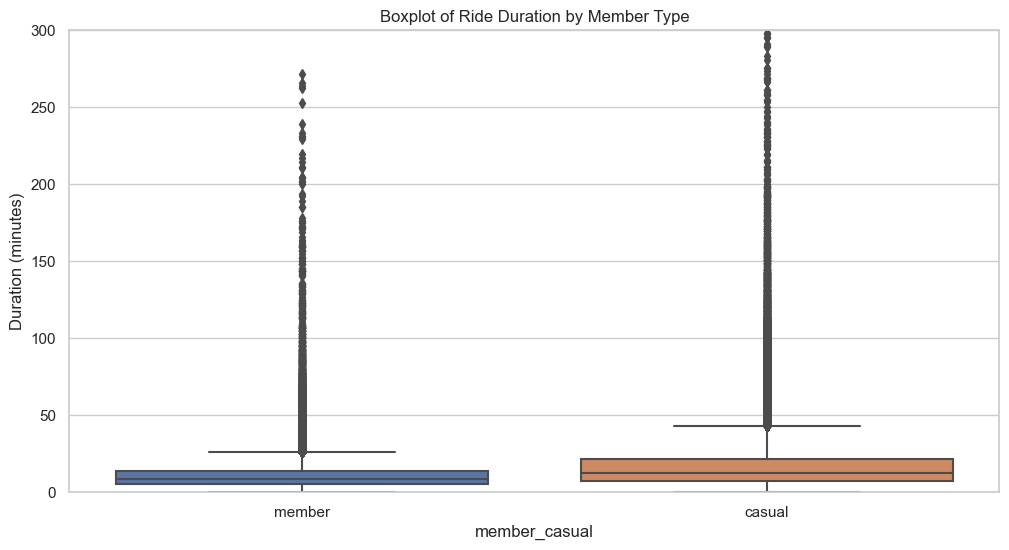

In [91]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='member_casual', y='duration_minutes', data=bw)
plt.title('Boxplot of Ride Duration by Member Type')
plt.ylabel('Duration (minutes)')
plt.ylim(0, 300)  # Set y-axis limits to focus on the main data distribution
plt.show()

In [92]:

Q1 = bw['duration_minutes'].quantile(0.25)
Q3 = bw['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = bw[(bw['duration_minutes'] < lower_bound) | (bw['duration_minutes'] > upper_bound)]
print(outliers[['ride_id', 'duration_minutes']])

                 ride_id  duration_minutes
2       52170B200ED0FC6C        446.310517
28      F26860DF5897717C         42.524400
104     E4B4F3019DEFC351         29.261783
113     93013069607A74E9         40.361117
114     E4B12829FC9618D3         56.914500
...                  ...               ...
334584  E981CE4DABD695D9         39.270467
334603  9517291AEEAE8B33         60.243833
334642  293A5F67CF7C59F1         45.971050
334681  0586A1A1441B8E82         37.502400
334685  97CEEAF4CF792A36         38.595283

[20809 rows x 2 columns]


In [94]:
# remove outlier
filtered_bw = bw[(bw['duration_minutes'] >= lower_bound) & (bw['duration_minutes'] <= upper_bound)]

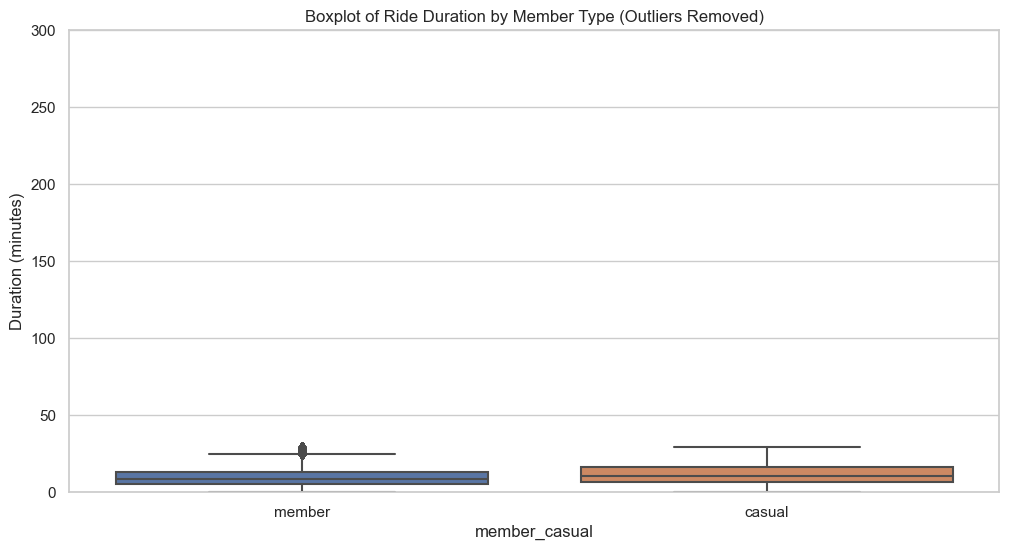

In [95]:
# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='member_casual', y='duration_minutes', data=filtered_bw)
plt.title('Boxplot of Ride Duration by Member Type (Outliers Removed)')
plt.ylabel('Duration (minutes)')
plt.ylim(0, 300)  # Adjust y-axis limits as needed
plt.show()

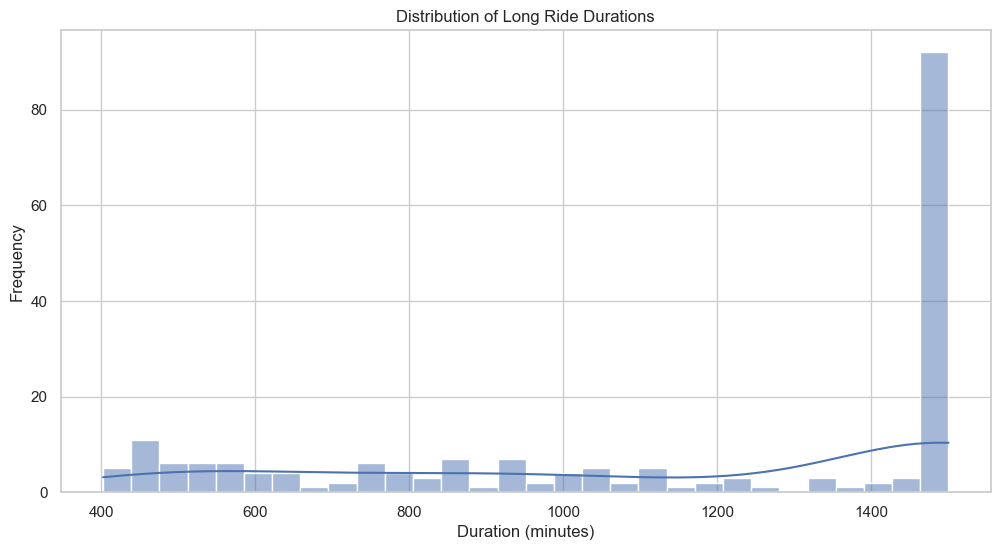

In [96]:
plt.figure(figsize=(12, 6))
sns.histplot(long_ride_info['duration_minutes'], bins=30, kde=True)
plt.title('Distribution of Long Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

/var/folders/sf/qkrwk5617wgdw0frsrqmg17r0000gn/T/ipykernel_78228/3545790592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_ride_info['duration_bins'] = pd.cut(long_ride_info['duration_minutes'], bins=bins, labels=labels, right=False)


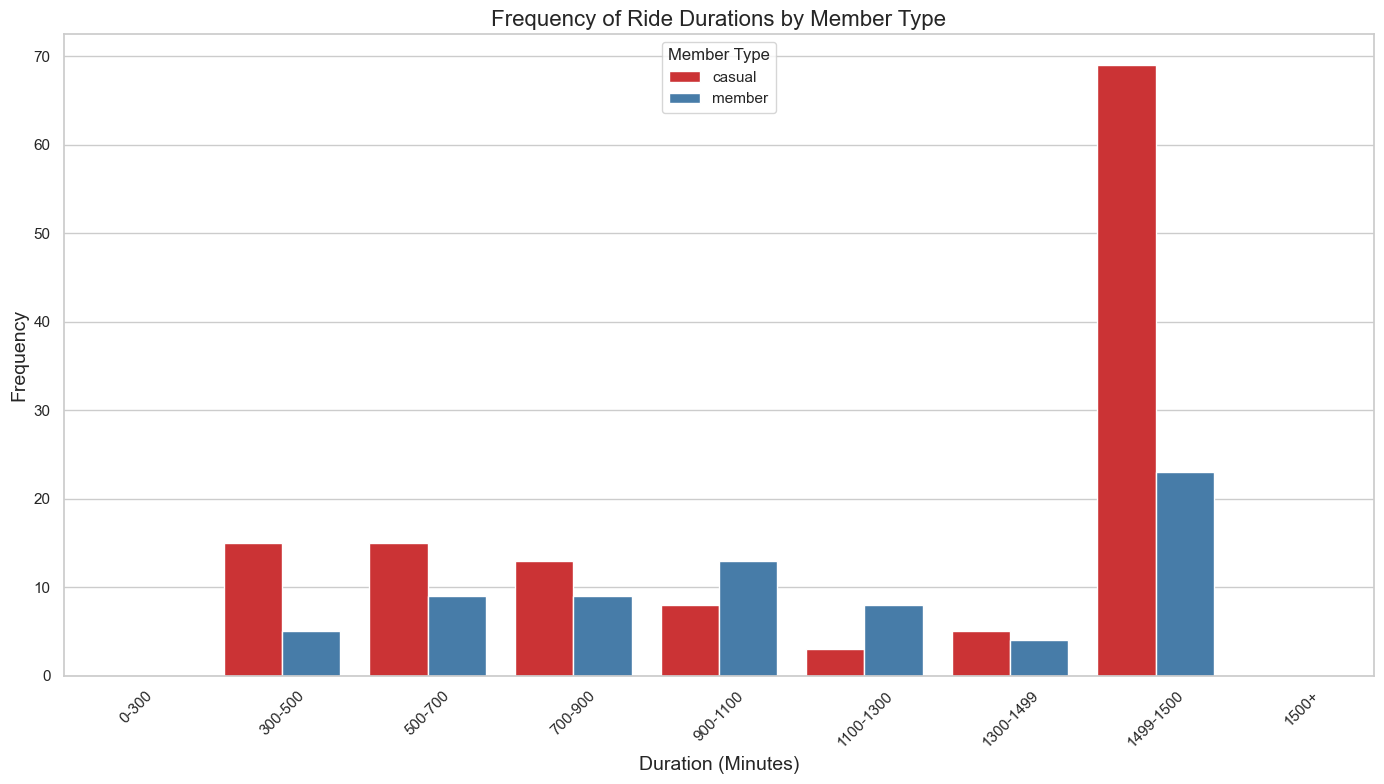

In [110]:
# Freq by Duration (long duration)

bins = [0, 300, 500, 700, 900, 1100, 1300, 1499, 1500, 2000] 
labels = ['0-300', '300-500', '500-700', '700-900', '900-1100', '1100-1300', '1300-1499', '1499-1500', '1500+']

long_ride_info['duration_bins'] = pd.cut(long_ride_info['duration_minutes'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(14, 8))
sns.countplot(data=long_ride_info, x='duration_bins', hue='member_casual', palette='Set1')

plt.title('Frequency of Ride Durations by Member Type', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Member Type')
plt.tight_layout()

plt.show()


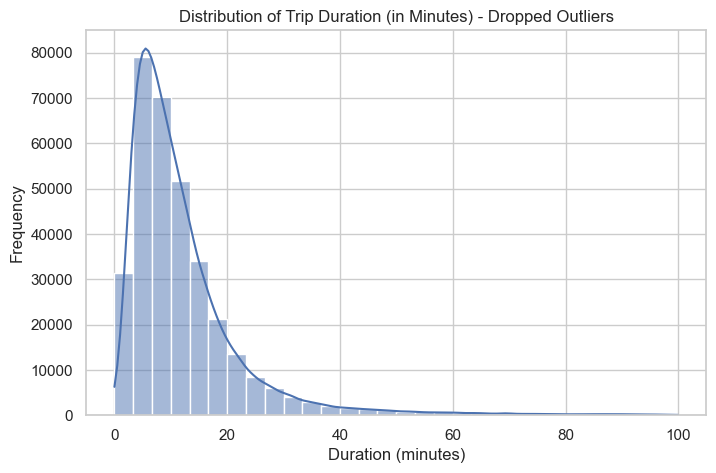

In [148]:
bw_filtered = bw[bw['duration_minutes'] <= 100]

# Create a bar plot to show the distribution of trip durations
plt.figure(figsize=(8, 5))
sns.histplot(data=bw_filtered, x='duration_minutes', bins=30, kde=True)
plt.title('Distribution of Trip Duration (in Minutes) - Dropped Outliers')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [150]:
bw.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_minutes,date,distance,day_of_week,hour_of_day
0,AAFD5548143DCE0A,electric_bike,2024-09-10 08:45:14.070,2024-09-10 09:06:58.772,30th St at San Jose Ave,SF-T21,2nd St at Folsom St,SF-H29,37.742314,-122.423181,37.785199,-122.396217,member,21.745033,2024-09-10,5.325203,Tuesday,8
1,7814A8CB2C9A70BB,electric_bike,2024-09-11 07:53:30.649,2024-09-11 08:12:53.687,30th St at San Jose Ave,SF-T21,2nd St at Folsom St,SF-H29,37.742314,-122.423181,37.785199,-122.396217,member,19.383967,2024-09-11,5.325203,Wednesday,7
2,52170B200ED0FC6C,classic_bike,2024-09-12 23:20:34.071,2024-09-13 06:46:52.702,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,The Embarcadero at Steuart St,SF-F30-1,37.771767,-122.386689,37.791401,-122.391038,casual,446.310517,2024-09-12,2.216499,Thursday,23
3,64DCD491A935BD82,classic_bike,2024-09-21 12:35:12.297,2024-09-21 12:39:00.009,Fifth St at Delaware St,BK-C1,Addison St at Fourth St,BK-D1,37.870407,-122.299676,37.866249,-122.299371,casual,3.795200,2024-09-21,0.463137,Saturday,12
4,F9C466FFD635DF57,classic_bike,2024-09-26 08:00:35.009,2024-09-26 08:10:24.804,Terry Francois Blvd at Mission Bay Blvd N,SF-L31-1,The Embarcadero at Steuart St,SF-F30-1,37.771767,-122.386689,37.791401,-122.391038,member,9.829917,2024-09-26,2.216499,Thursday,8


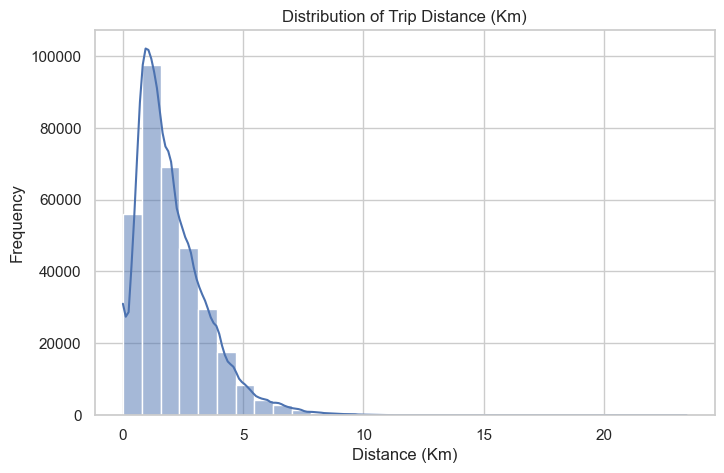

In [151]:
# Distance

plt.figure(figsize=(8, 5))
sns.histplot(data=bw, x='distance', bins=30, kde=True)
plt.title('Distribution of Trip Distance (Km)')
plt.xlabel('Distance (Km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

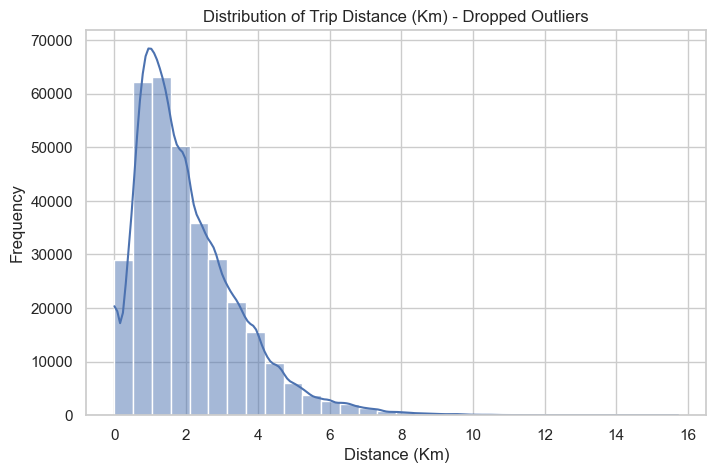

In [152]:
# filtered distance
plt.figure(figsize=(8, 5))
sns.histplot(data=bw_filtered, x='distance', bins=30, kde=True)
plt.title('Distribution of Trip Distance (Km) - Dropped Outliers')
plt.xlabel('Distance (Km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

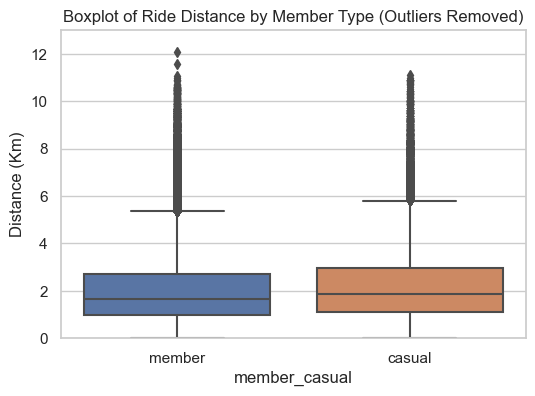

In [166]:
# Boxplot after removing outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x='member_casual', y='distance', data=bw_filtered)
plt.title('Boxplot of Ride Distance by Member Type (Outliers Removed)')
plt.ylabel('Distance (Km)')
plt.ylim(0, 13)  # Adjust y-axis limits as needed
plt.show()

In [169]:
# Distance outlier
Q1 = bw['distance'].quantile(0.25)
Q3 = bw['distance'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = bw[(bw['distance'] < lower_bound) | (bw['distance'] > upper_bound)]


In [170]:
outliers.count()

ride_id               10052
rideable_type         10052
started_at            10052
ended_at              10052
start_station_name     9470
start_station_id       9470
end_station_name       9353
end_station_id         9353
start_lat             10052
start_lng             10052
end_lat               10052
end_lng               10052
member_casual         10052
duration_minutes      10052
date                  10052
distance              10052
day_of_week           10052
hour_of_day           10052
dtype: int64

In [154]:
bw_filtered.count()

ride_id               333332
rideable_type         333332
started_at            333332
ended_at              333332
start_station_name    319369
start_station_id      319369
end_station_name      316726
end_station_id        316649
start_lat             333332
start_lng             333332
end_lat               333332
end_lng               333332
member_casual         333332
duration_minutes      333332
date                  333332
distance              333332
day_of_week           333332
hour_of_day           333332
dtype: int64

In [167]:
bw_distance_oulier = bw[bw['distance'] <= 6]
bw_distance_oulier.count()

ride_id               327849
rideable_type         327849
started_at            327849
ended_at              327849
start_station_name    314227
start_station_id      314227
end_station_name      311531
end_station_id        311454
start_lat             327849
start_lng             327849
end_lat               327849
end_lng               327849
member_casual         327849
duration_minutes      327849
date                  327849
distance              327849
day_of_week           327849
hour_of_day           327849
dtype: int64

# Modo Carshare (BC)

In [112]:
import requests

# Define the endpoint URL
url = 'https://bookit.modo.coop/api/v2/car_list'

# Optional parameters
params = {
    'car_id': 289,  # Get information for car with ID 289
    'checksum': 'ab613d91137e1f831796aae6e0d663fe',  # Optional checksum to compare
}

# Make a GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse and print the JSON response
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")


{'Status': 'Success', 'Checksum': '2c08d653e1ee60d55cd0da551026ea56', 'Response': {'CarCount': '0', 'Cars': []}}


In [113]:
response = requests.get('https://bookit.modo.coop/api/v2/car_list')


In [116]:
url = "https://bookit.modo.coop/api/v2/car_list"
response = requests.get(url)
data = response.json()

print(data)

{'Status': 'Success', 'Checksum': '40e27d0fff5c6ca59403d35628f641f9', 'Response': {'CarCount': '986', 'Cars': {'521': {'ID': '521', 'Make': 'Dodge', 'Model': 'Accessibility Van', 'Year': '2013', 'Colour': 'Silver', 'Identifier': None, 'Category': 'Accessibility Vehicle', 'Class': 'Van', 'ExceptionClass': 'Budget', 'Seats': '4', 'FuelType': 'Gasoline', 'Accessories': ['accessibility vehicle'], 'Location': [{'LocationID': '909', 'StartTime': None, 'EndTime': None}]}, '533': {'ID': '533', 'Make': 'Nissan', 'Model': 'Frontier', 'Year': '2014', 'Colour': 'White', 'Identifier': None, 'Category': 'Truck', 'Class': 'Cargo', 'ExceptionClass': None, 'Seats': '4', 'FuelType': 'Gasoline', 'Accessories': ['pickup truck'], 'Location': [{'LocationID': '91', 'StartTime': None, 'EndTime': None}]}, '720': {'ID': '720', 'Make': 'Nissan', 'Model': 'NV 200', 'Year': '2015', 'Colour': 'White', 'Identifier': None, 'Category': 'Cargo Van', 'Class': 'Cargo', 'ExceptionClass': None, 'Seats': '2', 'FuelType': 'G

In [118]:
if data['Status'] == 'Success':
    cars = data['Response']['Cars']
    for car_id, car_info in cars.items():
        print(f"Car ID: {car_id}")
        print(f"Make: {car_info['Make']}")
        print(f"Model: {car_info['Model']}")
        print(f"Year: {car_info['Year']}")
        print(f"Colour: {car_info['Colour']}")
        print(f"Seats: {car_info['Seats']}")
        print(f"Accessories: {', '.join(car_info['Accessories'])}")
        print(f"Location: {car_info['Location']}")


Car ID: 521
Make: Dodge
Model: Accessibility Van
Year: 2013
Colour: Silver
Seats: 4
Accessories: accessibility vehicle
Location: [{'LocationID': '909', 'StartTime': None, 'EndTime': None}]
Car ID: 533
Make: Nissan
Model: Frontier
Year: 2014
Colour: White
Seats: 4
Accessories: pickup truck
Location: [{'LocationID': '91', 'StartTime': None, 'EndTime': None}]
Car ID: 720
Make: Nissan
Model: NV 200
Year: 2015
Colour: White
Seats: 2
Accessories: 
Location: [{'LocationID': '10', 'StartTime': None, 'EndTime': None}]
Car ID: 757
Make: Honda
Model: Fit
Year: 2016
Colour: White
Seats: 5
Accessories: 
Location: [{'LocationID': '324', 'StartTime': None, 'EndTime': None}]
Car ID: 761
Make: Nissan
Model: Frontier
Year: 2016
Colour: White
Seats: 4
Accessories: pickup truck
Location: [{'LocationID': '30', 'StartTime': None, 'EndTime': None}]
Car ID: 763
Make: Honda
Model: CR-V
Year: 2016
Colour: Grey
Seats: 5
Accessories: all-wheel drive
Location: [{'LocationID': '810', 'StartTime': None, 'EndTime': N

In [119]:
import csv

# Assuming the response has car data
if data['Status'] == 'Success':
    cars = data['Response']['Cars']
    with open('car_list.csv', 'w', newline='') as csvfile:
        fieldnames = ['ID', 'Make', 'Model', 'Year', 'Colour', 'Seats', 'Accessories', 'Location']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for car_id, car_info in cars.items():
            writer.writerow({
                'ID': car_id,
                'Make': car_info['Make'],
                'Model': car_info['Model'],
                'Year': car_info['Year'],
                'Colour': car_info['Colour'],
                'Seats': car_info['Seats'],
                'Accessories': ', '.join(car_info['Accessories']),
                'Location': car_info['Location']
            })


In [121]:
# Step 2: Extract relevant car information
cars = data['Response']['Cars']

# Step 3: Prepare CSV file headers
csv_columns = ['ID', 'Make', 'Model', 'Year', 'Colour', 'Category', 'Class', 'ExceptionClass', 'Seats', 'FuelType', 'Accessories', 'LocationID', 'StartTime', 'EndTime']

# Step 4: Flatten data and write to CSV
csv_file = "car_data.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=csv_columns)
    writer.writeheader()
    
    for car_id, car_data in cars.items():
        # Flatten Location and Accessories
        for location in car_data.get('Location', []):
            row = {
                'ID': car_data.get('ID'),
                'Make': car_data.get('Make'),
                'Model': car_data.get('Model'),
                'Year': car_data.get('Year'),
                'Colour': car_data.get('Colour'),
                'Category': car_data.get('Category'),
                'Class': car_data.get('Class'),
                'ExceptionClass': car_data.get('ExceptionClass'),
                'Seats': car_data.get('Seats'),
                'FuelType': car_data.get('FuelType'),
                'Accessories': ', '.join(car_data.get('Accessories', [])),  # Join list into a string
                'LocationID': location.get('LocationID'),
                'StartTime': location.get('StartTime'),
                'EndTime': location.get('EndTime'),
            }
            writer.writerow(row)

print(f"Data has been successfully exported to {csv_file}.")


Data has been successfully exported to car_data.csv.


In [122]:
df3 = pd.read_csv('/Users/cheng/Desktop/Pocketride project/car_data.csv')

In [123]:
df3.head()

,ID,Make,Model,Year,Colour,Category,Class,ExceptionClass,Seats,FuelType,Accessories,LocationID,StartTime,EndTime
0,521,Dodge,Accessibility Van,2013,Silver,Accessibility Vehicle,Van,Budget,4,Gasoline,accessibility vehicle,909,NaN,NaN
1,533,Nissan,Frontier,2014,White,Truck,Cargo,NaN,4,Gasoline,pickup truck,91,NaN,NaN
2,720,Nissan,NV 200,2015,White,Cargo Van,Cargo,NaN,2,Gasoline,NaN,10,NaN,NaN
3,757,Honda,Fit,2016,White,4-door Hatchback,Car,NaN,5,Gasoline,NaN,324,NaN,NaN
4,761,Nissan,Frontier,2016,White,Truck,Cargo,NaN,4,Gasoline,pickup truck,30,NaN,NaN


In [124]:
df4 = df3[df3['StartTime'].notnull()]
df4.head()

,ID,Make,Model,Year,Colour,Category,Class,ExceptionClass,Seats,FuelType,Accessories,LocationID,StartTime,EndTime
33,907,Honda,Fit,2017,White,4-door Hatchback,Car,NaN,5,Gasoline,NaN,1021,1.729559e+09,NaN
202,1286,Ram,ProMaster,2019,White,Cargo Van,Cargo,Oversized,3,Gasoline,NaN,938,1.730380e+09,NaN
602,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,1.729602e+09,1.729638e+09
603,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,1.729602e+09,1.729638e+09
604,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,1.729602e+09,1.729638e+09


In [125]:
# Convert StartTime and EndTime from UNIX timestamp to datetime
df4['StartTime'] = pd.to_datetime(df3['StartTime'], unit='s')
df4['EndTime'] = pd.to_datetime(df3['EndTime'], unit='s')

/Users/cheng/anaconda3/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
/var/folders/sf/qkrwk5617wgdw0frsrqmg17r0000gn/T/ipykernel_78228/1722345545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['StartTime'] = pd.to_datetime(df3['StartTime'], unit='s')
/Users/cheng/anaconda3/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
/var/folders/sf/qkrwk5617wgdw0frsrqmg17r0000gn/T/ipykernel_78228/1722345545.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [126]:
df4.head()

,ID,Make,Model,Year,Colour,Category,Class,ExceptionClass,Seats,FuelType,Accessories,LocationID,StartTime,EndTime
33,907,Honda,Fit,2017,White,4-door Hatchback,Car,NaN,5,Gasoline,NaN,1021,2024-10-22 01:00:00,NaT
202,1286,Ram,ProMaster,2019,White,Cargo Van,Cargo,Oversized,3,Gasoline,NaN,938,2024-10-31 13:00:00,NaT
602,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,2024-10-22 13:00:00,2024-10-22 23:00:00
603,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,2024-10-22 13:00:00,2024-10-22 23:00:00
604,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,2024-10-22 13:00:00,2024-10-22 23:00:00


In [129]:
df4['StartTime'].min()

Timestamp('2024-10-22 01:00:00')

In [130]:
df4['StartTime'].max()

Timestamp('2025-02-28 14:00:00')

In [133]:
df4_sorted = df4.sort_values(by='StartTime', ascending=False)
df4_sorted.head()

,ID,Make,Model,Year,Colour,Category,Class,ExceptionClass,Seats,FuelType,Accessories,LocationID,StartTime,EndTime
917,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,2025-02-28 14:00:00,2025-03-01
916,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,2025-02-28 14:00:00,2025-03-01
915,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,2025-02-28 14:00:00,2025-03-01
914,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,2025-02-28 14:00:00,2025-03-01
913,1834,Kia,Forte,2023,White,4-door Sedan,Car,NaN,5,Gasoline,"audio: android auto, audio: apple carplay",763,2025-02-27 14:00:00,2025-02-28


Location List

In [134]:
# location list
url = "https://bookit.modo.coop/api/v2/location_list"

# Send the GET request to the API
response = requests.get(url)

# Convert the response into JSON
location_data = response.json()

# Convert the 'Locations' part of the response into a DataFrame
df_locations = pd.DataFrame(location_data['Response']['Locations'])

# Display the DataFrame
print(df_locations)

# If you want to save it to a CSV
df_locations.to_csv('locations.csv', index=False)

                                                             3  \
ID                                                           3   
Name                                           W 2nd & Cypress   
ShortDescription  Vancouver - West 2nd Avenue & Cypress Street   
Region                                          Lower Mainland   
City                                                 Vancouver   
Neighbourhood                                        Kitsilano   
Latitude                                            49.2698238   
Longitude                                         -123.1489344   
ExceptionClass                                            None   

                                                          5  \
ID                                                        5   
Name                                             Kits House   
ShortDescription  Vancouver - West 7th Avenue & Vine Street   
Region                                       Lower Mainland   
City                    

In [136]:
df5 = pd.read_csv('/Users/cheng/Desktop/Pocketride project/modo locations.csv')
df5

,3,5,6,8,9,10,11,15,16,17,...,1293,1294,1295,1296,1297,1298,1300,1301,1302,1303
0,3,5,6,8,9,10,11,15,16,17,...,1293,1294,1295,1296,1297,1298,1300,1301,1302,1303
1,W 2nd & Cypress,Kits House,Pendrell Plaza,Yaletown/Roundhouse Station,Lily,Horizon,Broughton Towers,E 10th & Commercial,Balsam & W 3rd,Westwind,...,McKenzie & Cook,Arts Student Centre (TEMP),710 Dogwood St,Royal Oak SkyTrain,Raymur & Union (TEMP),Discovery & Douglas,W 6th & Pine,Dunbar & W 22nd Ave,1655 Haro St,Institute Park
2,Vancouver - West 2nd Avenue & Cypress Street,Vancouver - West 7th Avenue & Vine Street,Vancouver - Pendrell Street & Bidwell Street,Vancouver - Davie Street & Mainland Street,Vancouver - Napier Street & Lily Street,Vancouver - Burnaby Street & Bute Street,Vancouver - Alberni Street & Broughton Street,Vancouver - East 10th Avenue & Commercial Drive,Vancouver - West 3rd Avenue & Balsam Street,Vancouver - West 11th Avenue & Granville Street,...,Victoria - McKenzie Street & Cook Street,UBC - East Mall & Walter Gage Road,Coquitlum - Smith Avenue & Dogwood Street,Burnaby - Beresford Street & Royal Oak Avenue,Vancouver - Raymur Avenue & Union Street,Victoria - Discovery Street & Douglas Street,Vancouver - West 6th Avenue & Pine Street,Vancouver - Dunbar Street & West 22nd Avenue,Vancouver - Haro Street & Bidwell Street,North Vancouver - Institute Road & Lynn Valley...
3,Lower Mainland,Lower Mainland,Lower Mainland,Lower Mainland,Lower Mainland,Lower Mainland,Lower Mainland,Lower Mainland,Lower Mainland,Lower Mainland,...,Greater Victoria,Lower Mainland,Lower Mainland,Lower Mainland,Lower Mainland,Greater Victoria,Lower Mainland,Lower Mainland,Lower Mainland,Lower Mainland
4,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,Vancouver,...,Victoria,UBC,Coquitlam,Burnaby,Vancouver,Victoria,Vancouver,Vancouver,Vancouver,North Vancouver District
5,Kitsilano,Kitsilano,West End,Yaletown,Grandview-Woodland,West End,West End,Kensington-Cedar Cottage,Kitsilano,Fairview,...,Fairfield,Main Campus,Burquitlam,Marlborough,Strathcona,Downtown Victoria,Kitsilano,Dunbar-Southlands,West End,Lynn Valley
6,49.2698238,49.2659861,49.2866436,49.2745973,49.2744801,49.2813653,49.2887394,49.2613806,49.2687265,49.2613271,...,48.415033,49.269091,49.260771,49.21978,49.277635,48.431895,49.266323,49.252371,49.289566,49.339376
7,-123.1489344,-123.1575689,-123.1392501,-123.121159,-123.0646059,-123.1358759,-123.1300325,-123.0712838,-123.1599132,-123.1398657,...,-123.355981,-123.253361,-122.883675,-122.987462,-123.083357,-123.364928,-123.14348,-123.185007,-123.133952,-123.03664
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
